# Seaborn

Seaborn complementa a Mathplotlib, con una filosofía de hacer fácil lo menos fácil.  Incluye temas personalizados que nos permiten controlar la forma como se dibujan los gráficos.

En este sentido soluciona 2 problemas existentes en Matplotlib:

* Parámetros por defecto.
* Trabajar con DataFrames.


In [ ]:
# pip install seaborn
# conda install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
from pylab import *
import warnings
warnings.filterwarnings('ignore')

### Definiendo la estética de mathplotlib

Generamos un set de datos.  Básicamente una función senoidal que pintaremos con mathplotlib y modificaremos su estética con seaborn

In [ ]:
sns.reset_defaults()

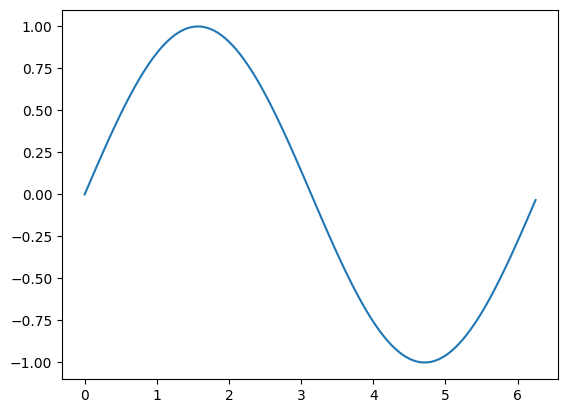

In [ ]:
x=np.arange(0, math.pi*2, 0.05) # Rango de datos para pintar el eje X
y=np.sin(x)
plt.plot(x,y)
plt.show()

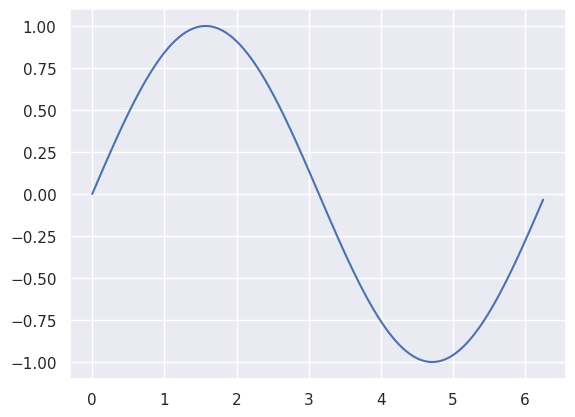

In [ ]:
x=np.arange(0, math.pi*2, 0.05) # Rango de datos para pintar el eje X
y=np.sin(x)

sns.set()
plt.plot(x,y)
plt.show()

Definiendo el fondo y otros elementos estéticos a través de set_style():
* Darkgrid
* Whitegrid
* Dark
* White
* Ticks

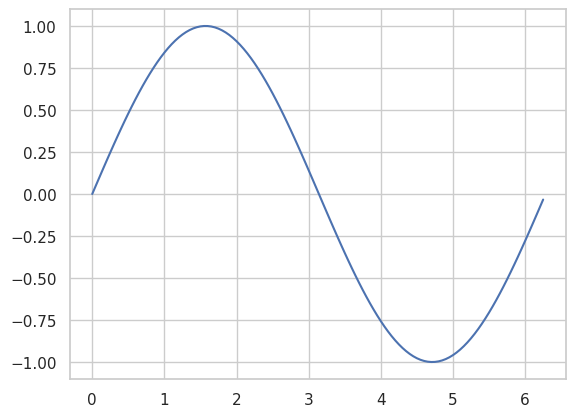

In [ ]:
sns.set_style('whitegrid')
plt.plot(x,y)
plt.show()

#### Eliminar la cuadrídula

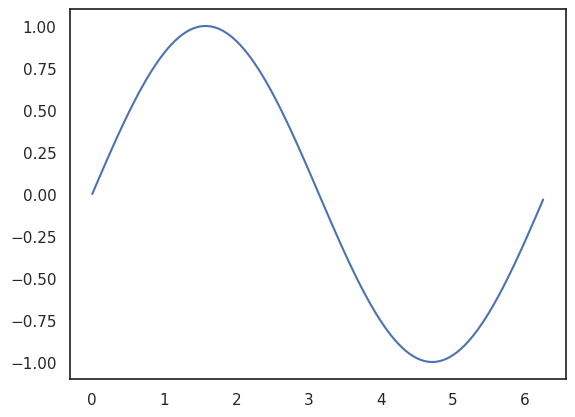

In [ ]:
sns.set_style('white')
sns.despine() # Si colocamos despine bajo plot, el resultado es distinto
plt.plot(x,y)
plt.show()

Podemos definir los parámetros de configuración de los gráficos a través de un diccionario.

In [ ]:
# Parámetros por defecto
print(sns.axes_style())

{'axes.facecolor': 'white', 'axes.edgecolor': '.15', 'axes.grid': False, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': '.8', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.round: 'round'>, 'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'image.cmap': 'rocket', 'font.family': ['sans-serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'xtick.bottom': False, 'xtick.top': False, 'ytick.left': False, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


Podríamos modificar cualquiera de los parámetros definidos por defecto...

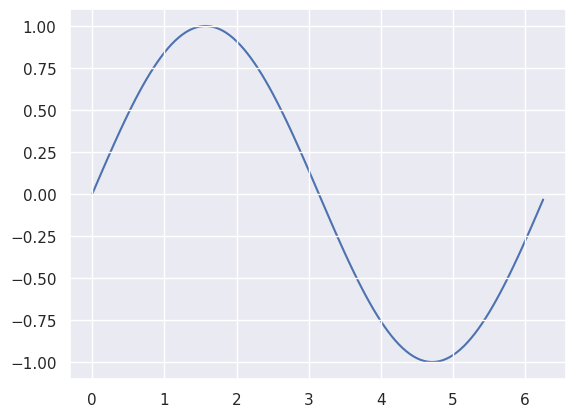

In [ ]:
# Añadimos fondo gris, y traemos la cuadrícula sobre el gráfico y eliminamos el marco de la imagen (despine())
sns.set_style('darkgrid', {'axes.axisbelow':False})
sns.despine()
plt.plot(x,y)
plt.show()

### Escalado rápido de las gráficas

A través de set_context() podemos definir 4 niveles de escalado.
* paper
* notebook: Opción por defecto
* talk
* poster

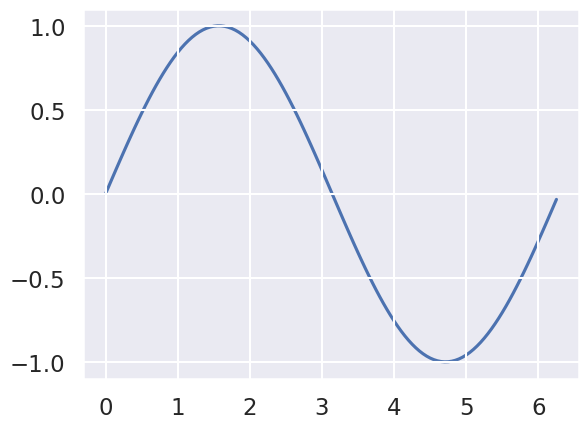

In [ ]:
sns.set_style('darkgrid', {'axes.axisbelow':False})
sns.set_context('talk')
sns.despine()
plt.plot(x,y)
plt.show()

### Trabajando con colores

Parámetros:
* n_colors: Nº de colores de la paleta.  Por defecto = 6
* desat: % de desaturación para cada color.

Por defecto, tenemos 6 paletas:

* deep
* muted
* brigth
* pastel
* dark
* colorblind

Pero podemos crear nuestras propias paletas

In [ ]:
sns.color_palette(palette=['red', 'blue', 'green'], n_colors=3, desat= 1)

[(1.0, 0.0, 0.0), (0.0, 0.0, 1.0), (0.0, 0.5019607843137255, 0.0)]

In [ ]:
sns.color_palette(palette=['red', 'blue', 'green'], n_colors=3, desat= 0.5)

[(0.75, 0.25, 0.25),
 (0.25, 0.25, 0.75),
 (0.12549019607843137, 0.3764705882352941, 0.12549019607843137)]

In [ ]:
paleta1 = sns.color_palette(palette=['red', 'blue', 'green'], n_colors=3, desat= 0.9)

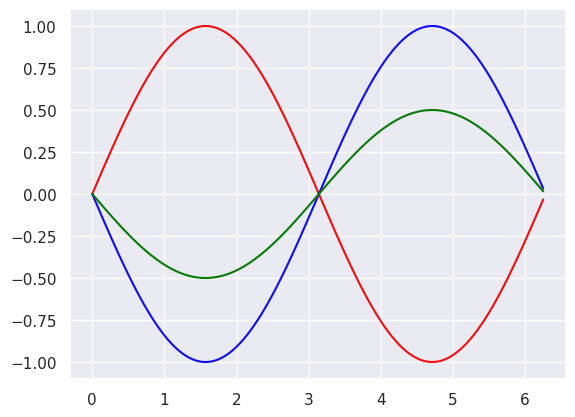

In [ ]:
# Usamos la nueva paleta.
sns.set(context='notebook', style='darkgrid', palette=paleta1, font='sans-serif', font_scale=1, color_codes=False, rc=None)
plt.plot(x,y)
plt.plot(x,-y)
plt.plot(x,-y/2)
plt.show()

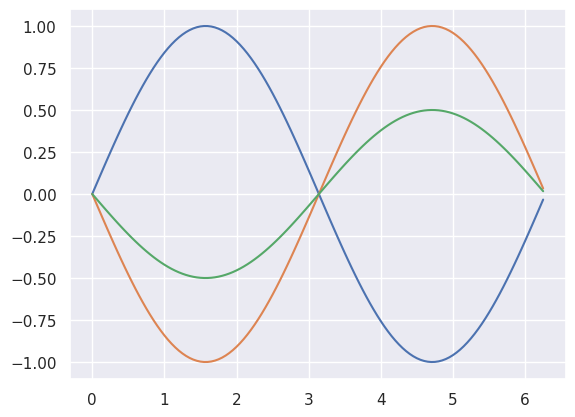

In [ ]:
# Usamos una paleta por defecto.
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
plt.plot(x,y)
plt.plot(x,-y)
plt.plot(x,-y/2)
plt.show()

Si usamos despine() junto con set_style("white"), sólo se mostrarán 2 de los 4 marcos de la imagen (frente a ninguno si los usamos con otro set_style)

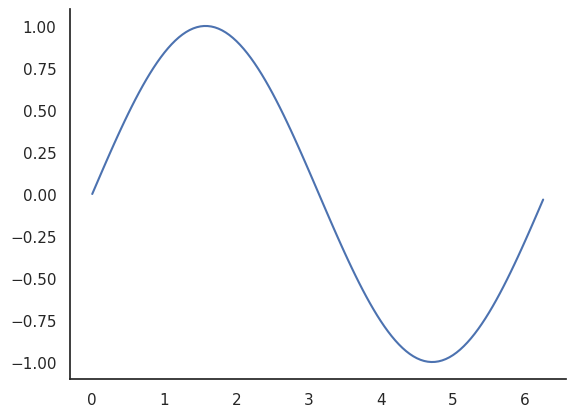

In [ ]:
sns.set_style("white")
plt.plot(x,y)
sns.despine()
plt.show()

Podemos usar 3 tipos diferentes de paletas:
* qualitative.  Colores categóricos (rojo, verde, azul, ...
* sequential. Secuencia de diferentes tonalidades de un color
* diverging. Colores divergentes

Definiremos la paleta a usar con **palplot()**

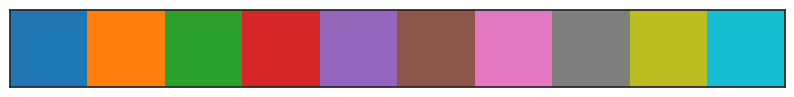

In [ ]:
# qualitative.  1 paleta. tab10.  Si no se indica otra, es la que toma por defecto
paleta = sns.color_palette('tab10',10)
sns.palplot(paleta)
plt.show()

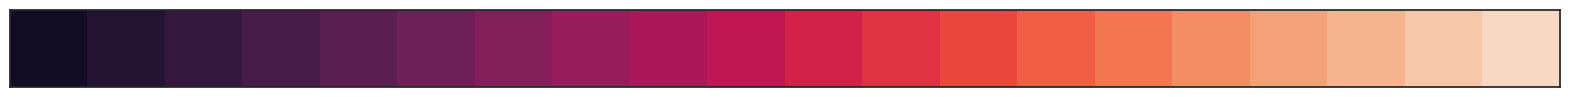

In [ ]:
# sequential
# disponemos de 4 paletas secuenciales por defecto: rocket, mako, flare, crest
paleta = sns.color_palette('rocket',20)
sns.palplot(paleta)
plt.show()

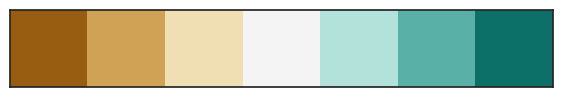

In [ ]:
# divergent.
# Se basa en representar 2 colores
paleta = sns.color_palette("BrBG", 7) # Paleta con 7 colores empezando por el marrón (br) y terminando en el verde oscuro (BG)
sns.palplot(paleta)
plt.show()

Como hemos visto antes, a través de **set_style()** definimos las opciones por defecto, incluida la paleta a usar.

## Gráficando...

### Histograma

In [ ]:
# Usaremos el dataset iris.
df = sns.load_dataset('iris')


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


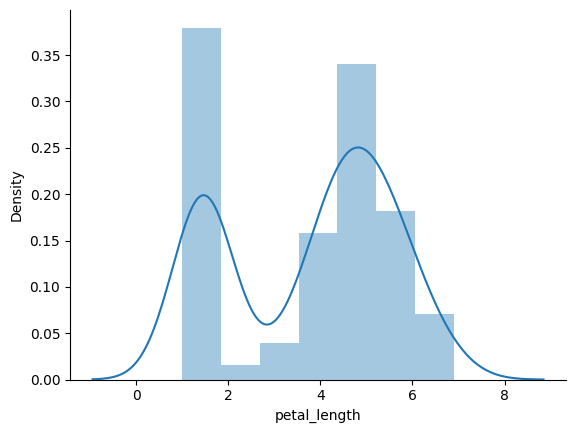

In [ ]:
sns.reset_defaults() # volvemos a la configuración por defecto.
sns.distplot(df['petal_length'],bins = 7, kde=True)
sns.despine()
plt.show()

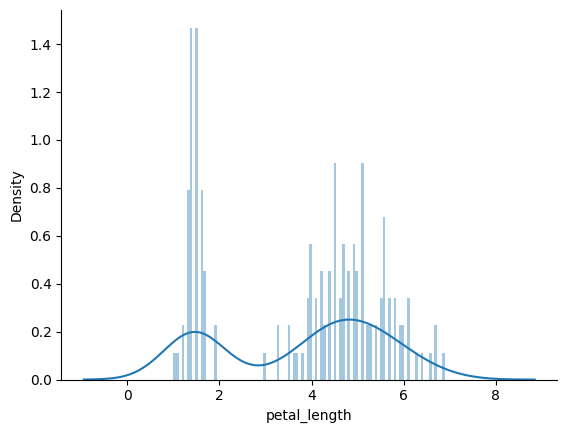

In [ ]:
# Podemos aumentar la definición de la imagen a través de los bins y mostrar KDE (método no paramétrico
# que permite estimar la funcion de densidad de probabilidad de una variable aleatoria a partir de un número finito de observaciones
sns.distplot(df['petal_length'],bins = 100)
sns.despine()
plt.show()

### Scatter plot

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


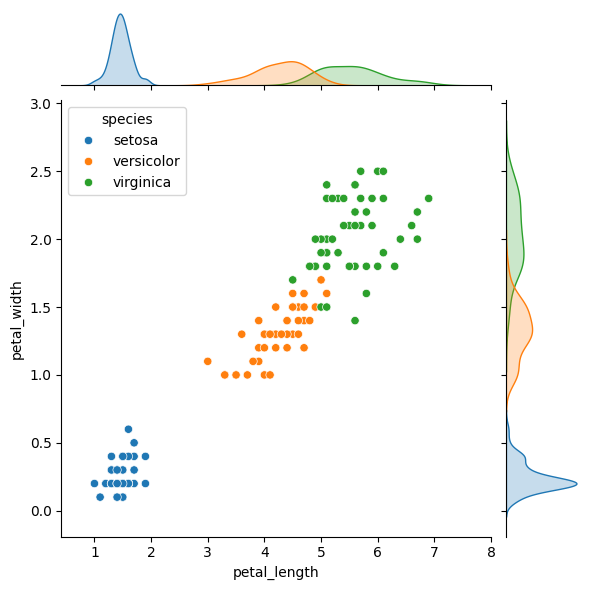

In [ ]:
sns.jointplot(x='petal_length',y='petal_width', hue='species', data=df)
plt.show()

### Hexbin plot

A usar en análisis bivariante, cuando la densidad de los datos sea baja (datos dispersos)

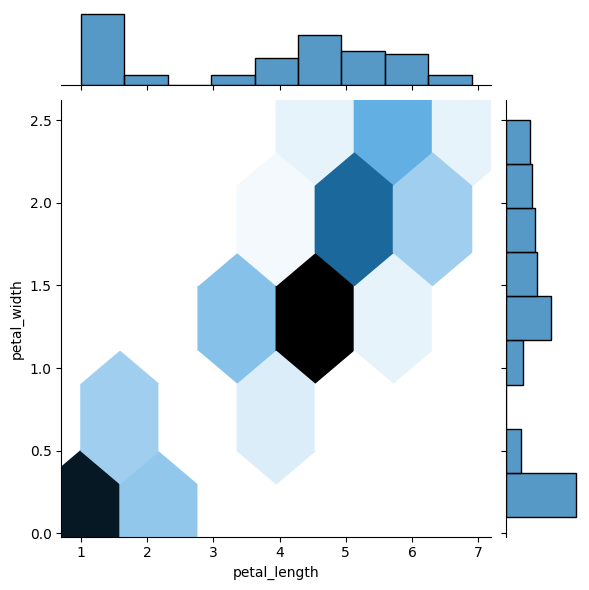

In [ ]:
sns.jointplot(x='petal_length',y='petal_width', data=df, kind='hex')
plt.show()

### Estimación de la distribución de una variables (KDE)

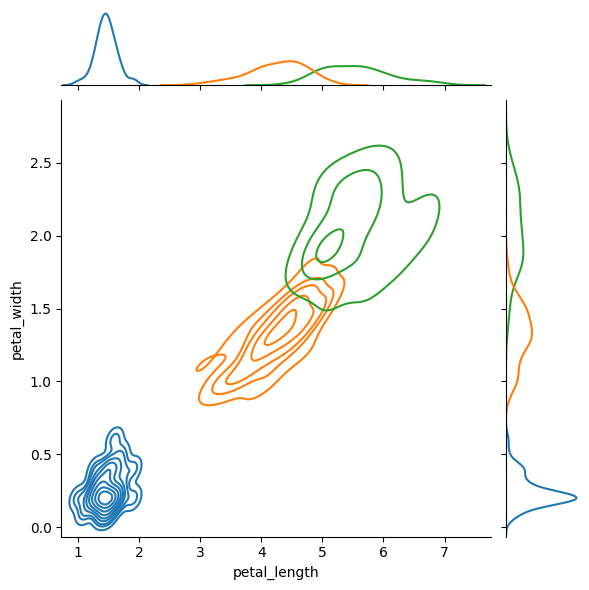

In [ ]:
g = sns.jointplot(data=df, x='petal_length',y='petal_width', kind='kde', hue='species', legend=False)
plt.show()


### Boxplot

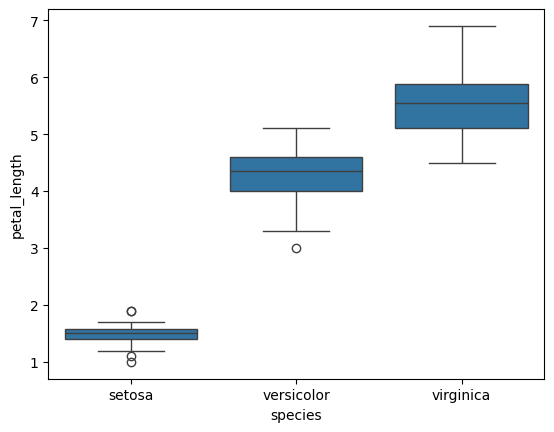

In [ ]:
sns.boxplot(x="species", y="petal_length", data=df)
plt.show()

### Violin plot

In [ ]:
# Usaremos el dataset de propinas
df2 = sns.load_dataset('tips')

In [ ]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


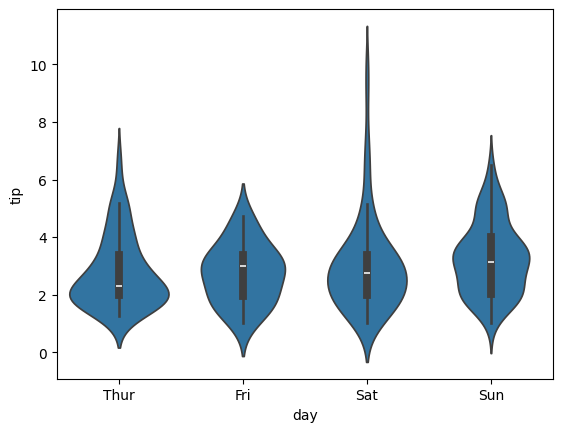

In [ ]:
sns.violinplot(x = "day", y = "tip", data=df2)
plt.show()

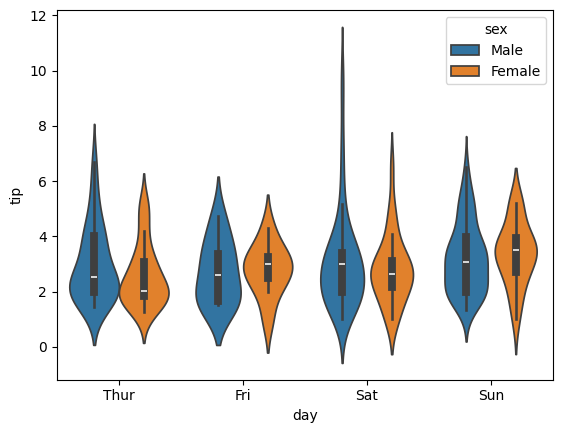

In [ ]:
sns.violinplot(x = "day", y = "tip", hue="sex", data=df2)
plt.show()

### Mapas de calor

In [ ]:
#Nos permite ver de manera rápida los datos.  Sólo funciona con valores numéricos.
df3 = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])
df3.head()


,a,b,c,d,e
0,0.227609,0.159456,0.185860,0.189042,0.024092
1,0.200685,0.916467,0.745718,0.807787,0.260028
2,0.152661,0.416764,0.153623,0.902954,0.335262
3,0.996561,0.792954,0.601010,0.628451,0.969576
4,0.778366,0.629804,0.106006,0.092734,0.400501


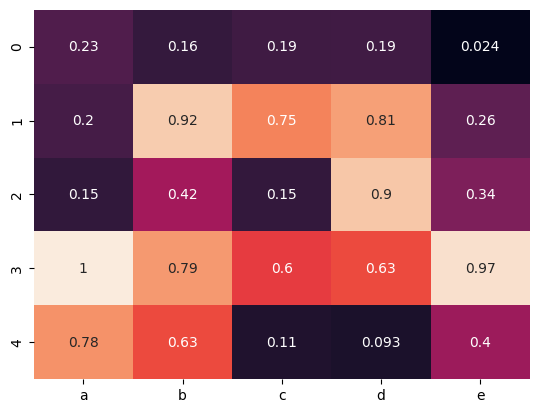

In [ ]:
sns.heatmap(df3, annot=True, cbar=False)
plt.show()

### Correlogramas

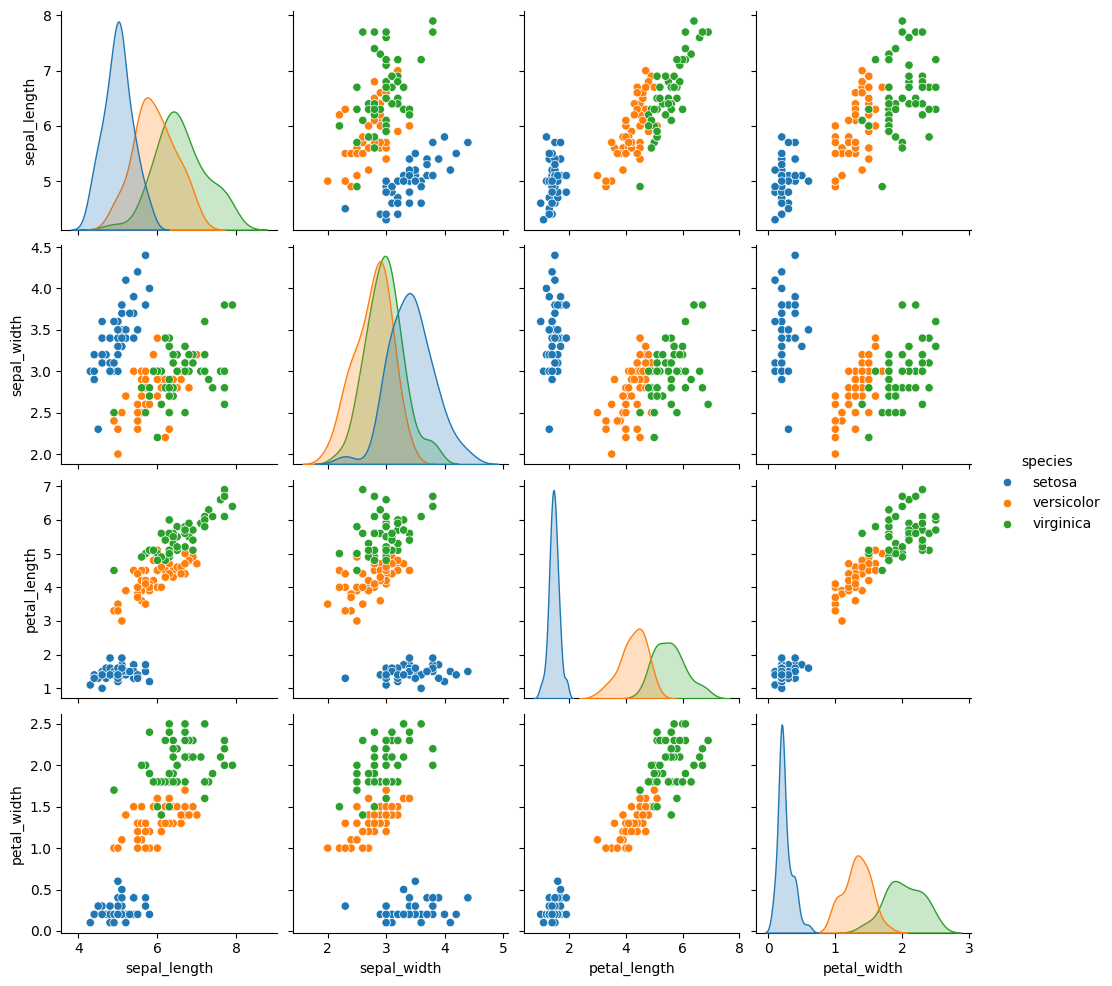

In [ ]:
sns.pairplot(df,hue='species')
plt.show()

### Gráficos de burbujas

In [ ]:
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


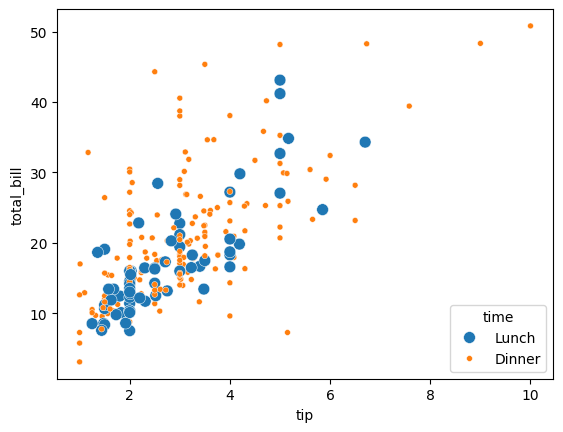

In [ ]:
sns.scatterplot(data=df2, y='total_bill', x='tip', size='time', hue='time')
plt.show()

### Treemap

In [ ]:
#pip install squarify
import squarify

ModuleNotFoundError: No module named 'squarify'

In [ ]:
df4 = df2[['total_bill', 'tip', 'sex']]
df4.head()

In [ ]:
df4.sort_values('total_bill', ascending=False, inplace=True)

In [ ]:
squarify.plot(sizes=df4.total_bill, label=df4.sex)
plt.axis('off')
plt.show()

### Dendogramas

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df.iloc[:,:-1], 'ward')
Z

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

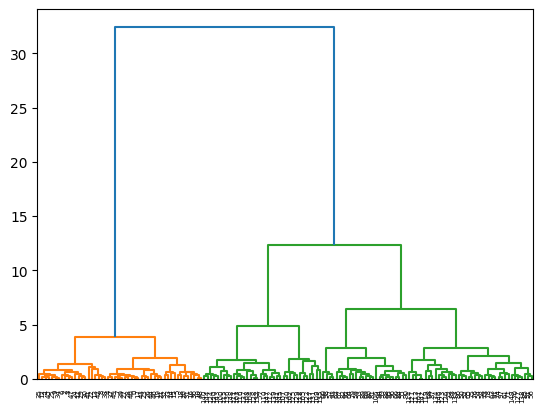

In [ ]:
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.show()

### Donuts

In [ ]:
# Contruimos los agregados, en este caso el total de elementos por clase en Iris
totales = df.groupby('species')['species'].count()
totales

,species
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
# Círculo de radio interior 0.3 y exterior 0.5
plt.Circle

matplotlib.patches.Circle

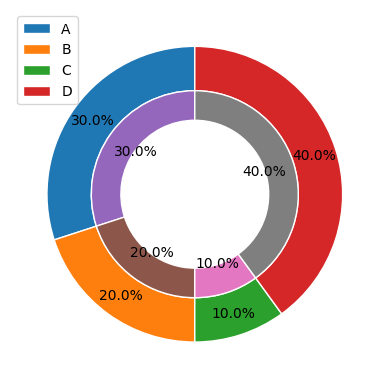

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
totales_exterior = np.array([30, 20, 10, 40])
totales_interior = np.array([15, 10, 5, 20])
etiquetas = ['A', 'B', 'C', 'D']

# Crear el gráfico de tarta exterior
plt.pie(totales_exterior, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='w'))

# Crear el gráfico de tarta interior
plt.pie(totales_interior, labels=None, radius=0.7, autopct='%1.1f%%', startangle=90, pctdistance=0.7, wedgeprops=dict(width=0.2, edgecolor='w'))

# Crear el círculo central blanco
circulo_central = plt.Circle((0, 0), 0.5, color='white')

# Añadir el círculo central al gráfico
p = plt.gcf()
p.gca().add_artist(circulo_central)

# Añadir leyenda
plt.legend(labels=etiquetas, loc='upper left')

# Mostrar el gráfico
plt.show()

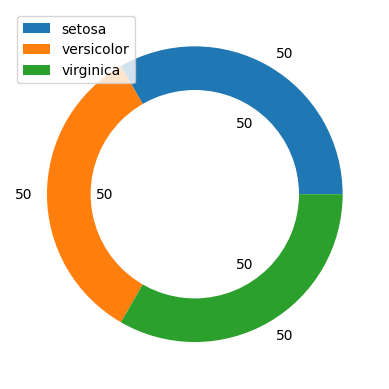

In [ ]:
etiquetas = totales
plt.pie(totales, labels=etiquetas)
circulo_central = plt.Circle((0,0), 0.7, color='white')

plt.pie(totales, labels=etiquetas, radius=0.5)
#p=plt.gcf()
#p.gca().add_artist(circulo_central)
#circulo_central = plt.Circle((0,0), 0.3, color='white')

p=plt.gcf()
p.gca().add_artist(circulo_central)
plt.legend(labels=totales.index, loc='upper left')
plt.show()

### Más gráficos en python
https://www.python-graph-gallery.com/